<a href="https://colab.research.google.com/github/Elman295/Kaggle_codes/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle
     

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/


In [4]:
! kaggle competitions download -c dog-breed-identification

dog-breed-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch 
import torchvision 
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision import models
from torchvision.io import read_image
from torch import nn


In [6]:
with zipfile.ZipFile("dog-breed-identification.zip","r") as f:
  f.extractall("data")

In [7]:
data_csv_path = os.path.join("data","labels.csv")
data_csv = pd.read_csv(data_csv_path)
data_csv.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [8]:
data_csv["breed"].value_counts

<bound method IndexOpsMixin.value_counts of 0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object>

In [9]:
pd.get_dummies(data_csv["breed"]).values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
x = torch.tensor(pd.get_dummies(data_csv["breed"], dummy_na=True).values, dtype = torch.float32)
x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [11]:
data_csv["breed"].values

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
data_csv.iloc[0,0] + ".jpg"

'000bec180eb18c7604dcecc8fe0dba07.jpg'

In [13]:
data_csv.iloc[:10,1]

0           boston_bull
1                 dingo
2              pekinese
3              bluetick
4      golden_retriever
5    bedlington_terrier
6    bedlington_terrier
7                borzoi
8               basenji
9    scottish_deerhound
Name: breed, dtype: object

In [14]:
class DogDataSet(Dataset):

  def __init__(self, label_path, train_path, transforms):

    self.label_path = label_path
    self.labels_images = pd.read_csv(label_path) 
    self.train_path = train_path
    self.transforms = transforms

  def __len__(self):
    return len(self.labels_images)

  def __getitem__(self, id):

    image_path = self.labels_images.iloc[id,0]

    image = Image.open(os.path.join(self.train_path,image_path + ".jpg")).convert("RGB")  
    label_raw = self.labels_images["breed"]
    label_one_hot = pd.get_dummies(label_raw, dummy_na=True) 
    image = self.transforms(image)

    return image, torch.tensor(label_one_hot.values[id], dtype = torch.float32)
 
   




In [15]:
label_path = os.path.join("data","labels.csv")
train_path = os.path.join("data","train")
tfms = transforms.Compose([
    transforms.Resize(size = (50,50)),
    transforms.RandomCrop(size = 50),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5,0.5,0.5), std = (0.5,0.5,0.5))
])


training_dataset = DogDataSet(label_path, train_path, tfms)

In [16]:
image, label = iter(training_dataset[1])
print(label)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [17]:
BATCH_SIZE = 32

train_dataloader = DataLoader(training_dataset, batch_size = BATCH_SIZE, shuffle = True)

In [18]:
train_dataloader.dataset

In [19]:
image, label = training_dataset[0]
print(label)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [20]:
images, labels = next(iter(train_dataloader))
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 50, 50])
torch.Size([32, 121])


In [21]:
print(labels[0])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [22]:
print(images.dtype)

torch.float32


In [23]:
print(labels.dtype)

torch.float32


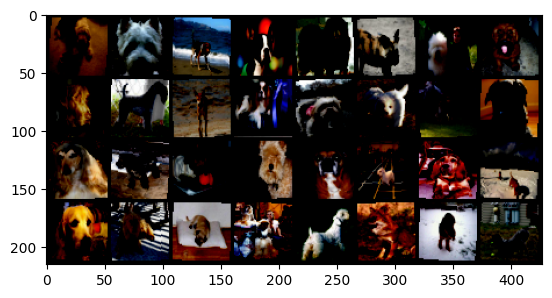

In [24]:
out = torchvision.utils.make_grid(images, padding = 3)
plt.imshow(np.transpose(out,(1,2,0)))
plt.show()

In [25]:
class Model(nn.Module):

  def __init__(self):
    super(Model,self).__init__()

    self.main = nn.Sequential(
        

        nn.Conv2d(3,128,5,1,0),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,1),


        nn.Conv2d(128,256,5,1,0),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2,1),



        nn.Conv2d(256,512,5,1,0),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2,1),

        nn.Conv2d(512,512,5,1,0),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2,1),

        nn.Flatten(),

        nn.LazyLinear(512),
        nn.ReLU(),
        nn.Linear(512,128),
        nn.ReLU(),

        nn.Linear(128,121)


    ) 

  def forward(self,x):
    x = self.main(x)
    return x

In [26]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [27]:
model = Model() 
model.to(device)

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model(
  (main): Sequential(
    (0): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(512, 512, kernel_size=(5, 5), stride=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=1, pad

In [28]:
loss_function = nn.CrossEntropyLoss()
optim_function = torch.optim.Adam(params = model.parameters(), lr = 1e-3)

In [29]:
def train(dataloader, model, loss_fn, optim):
  size = len(dataloader.dataset)
  for batch, (x,y) in enumerate(dataloader):
    x,y = x.to(device),y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(x)
      print(f"loss is {loss} [{current} / {size}] ")

In [30]:
EPOCHS = 20
for epochs in range(EPOCHS):
  print(f"epoch:{epochs}=-=-=-=-=-=-=-=-=-=--=")
  train(train_dataloader, model, loss_function,optim_function)
print("DONE !!!")

epoch:0=-=-=-=-=-=-=-=-=-=--=
loss is 4.791886329650879 [0 / 10222] 
loss is 4.786579132080078 [3200 / 10222] 
loss is 4.797922611236572 [6400 / 10222] 
loss is 4.793549537658691 [9600 / 10222] 
epoch:1=-=-=-=-=-=-=-=-=-=--=
loss is 4.7941179275512695 [0 / 10222] 
loss is 4.797987937927246 [3200 / 10222] 
loss is 4.788064956665039 [6400 / 10222] 
loss is 4.787702560424805 [9600 / 10222] 
epoch:2=-=-=-=-=-=-=-=-=-=--=
loss is 4.786962509155273 [0 / 10222] 
loss is 4.7902703285217285 [3200 / 10222] 
loss is 4.772828102111816 [6400 / 10222] 
loss is 4.794379234313965 [9600 / 10222] 
epoch:3=-=-=-=-=-=-=-=-=-=--=
loss is 4.785998821258545 [0 / 10222] 
loss is 4.788612365722656 [3200 / 10222] 
loss is 4.786691665649414 [6400 / 10222] 
loss is 4.796388626098633 [9600 / 10222] 
epoch:4=-=-=-=-=-=-=-=-=-=--=
loss is 4.800236701965332 [0 / 10222] 
loss is 4.782509803771973 [3200 / 10222] 
loss is 4.767068386077881 [6400 / 10222] 
loss is 4.790142059326172 [9600 / 10222] 
epoch:5=-=-=-=-=-=-=-=-